The Dataset
start with the dataset then do the modeling


# Commuting Stress




![Gridlock](https://github.com/Osheah/images/raw/master/commute-stress/img/gridlock.jpg)



## Simulate commuting stress

Summarise the paper by Tony Cassidy (Cassidy, 1992)



## Why simulate data?

### What is data simulation

Data simulation typically involves generating pseudo random numbers. It is often used in stochastic modeling where some event changes over time. Simulating data has many real world applications. It is used in life sciences, quality control, measuring response rates of customer services, financial and investment modeling and many other areas.  There are several compelling reasons for simulating data [Ref](https://www.sciencedirect.com/topics/earth-and-planetary-sciences/data-simulation). 

#### Known paramaters
In a simulated model, the values of the underlying parameters are known. This allows a comparison to be made with the real world dataset it purports to model. 

#### Tweak parameters
Simulating data allows for the parameters to be fine tuned. Parameters may influence each other and performing small adjustments to one parameter can help identify its affect on other inputs such as in sensitivity analysis. In real world situations it may be impossible to control the environment to such an extent that such fine tuned adjustments can be made. 

#### Sample errors
There is a natural variation in data measurements. Collecting one set of flower samples to measure their petal widths is unlikely to yield the exact same measurements if collected at another date. Similarly, asking one set of questions on a survey may produce different responses when asked at another time. There is a natural variation in measurements. The variation in sampling data is a measure of statistical precision. Running data simulations is a valuable way of seeing the effect of randomness on natural processes.    

#### Check things are working correctly
Data simulations are useful to check that real world systems are on target or working as expected. A model can be run several times with different parameters or sample sizes and the means or other estimator can be calculated and compared to the real world system. 

#### Check statistical power
Is there an actual relationship between input values and outputs values? Statistical power is a measure of finding an effect on the data when it exists. It is linked to the sample size used to model the phenomenon in question. Data simulation allows variation in sample size so that statistical power can be analysed. 

#### Check parameter identification
Are the right parameters used? Would a different parameter fit the model better? Data simulation allows for various 'runs' to be conducted with varying parameters. Results can then be checked for clusters and signs that the parameter is indeed a parameter (or not). 

#### Check estimator strength
Data simulations produce estimators which can then be checked for robustness. If the model does not predict an effect measured by the estimator but the real world data shows such an effect then there is an assumption violation. Simulations help identify this by limiting certain parameters to test out specific ones. This allows the strength of the estimator or the strength of underlying biases to be measured. 

#### Develops understanding of real world phenomena
If an analyst can model the real world phenomena in question then they have abstracted its core features, modeled it and recreated the item investigated. This aids their understanding of this phenomenon. 
references for this came from (Kéry & Royle, 2016)

### Stochastic modeling
Stochastic modeling is a type of mathematical modeling that uses random processes and probability distributions to model some data that can change with time. It is often applied to financial modeling in investments or population modeling in life sciences(Wikipedia contributors, 2018 September 17). 


## Chose a real world phenomenon
The topic chosen for this project is commuting factors and its impact on stress levels. 

### Why this topic?
This topic was chosen as I previously commuted several hours per day for both college and work, and currently have family members that make long commutes daily. I hypothesize that there is a relationship between the length of commute, level of control of the journey, the level of impedance experienced commuting and the length of time spent as a commuter with the level of stress experienced. I expect that longer journeys are more stressful than shorter ones; High impedance (e.g. slow traffic) produces more stress and that a low level of perceived control is linked to more stress. I suspect that the longer people spend commuting, the more stress the report but it also may be that the longer people spend commuting the less stress they report as they become use to their daily routine. I came across Cassidy's 1992 paper *Commuting-related Stress: Consequences and Implications* and thought it suitable to model for this assignment. 


## Commuting and Stress
Modern life is stressful. In pre written history times people experienced stress; Finding food safety and shelter without getting killed takes a toll. Stress can be very useful especially if escaping from a predator. The fight or flight physiological stress response can mean surviving for another day [ref](https://en.wikipedia.org/wiki/Fight-or-flight_response). The same response is found with modern incarnations of stress but the triggers are for the most part very different. Now, we are unlikely to face attacks from a saber tooth tiger. Instead, modern stress triggers are more insidious and chronic. It can be a constant anxiety that permeates everyday life with no clear source or solution. Hassard *et al* (2014) noted that the cost of work related stress in the EU was estimated at 20 billion in 2002. Cassidy, (1992) noted that the UK's gross national product looses up to ten percent per annum due to stress and its consequences. There are many factors contributing to stress, financial stress, relationship stress, health stress to name but a few. This report looks at one source of reported stress, the daily commute. The Central Statistics Office (2017) puts the number of people (workers and students) commuting in Ireland at almost 3 million. They found a steady rise in the number of people commuting to work. What effect does this daily routine have on the psychological and physical health of the population? Costa *et al* as cited in Cassidy (1992) noted that within the European Union, commuters and distance traveled have increased but the duration of the commute has decreased. We are traveling further for work and getting there faster. This has knock on implications with the number of road accidents as well as impact on the home and work life of the people involved. 

Cassidy 1992 noted that while commuting itself is stressful it also compounds stress in other domains. It can affect home life, recreational activities and increase work absenteeism. Costa *et al* as cited in Cassidy (1992) found public transport commuters reported a more stressed lifestyle. Whereas Gulian *et al* as cited in Cassidy (1992) found 'road rage' stress was experienced by people who drive to work. Both modes of transportation produce stress. Schaeffer *et al* as cited in Cassidy found that stress levels were mitigated by the **level of control** (or at least perceived control) the commuter had on their journey. 

Cassidy, (1992) investigated stress and commuting. He conducted a study of 370 participants who commute to work. He collected information via a questionnaire on measures such as daily commute **distance** and **duration**, **time** spent commuting and any **impedance**. Impedance was defined as the average miles per hour the commute took. The lower the speed, the higher the impedance. In addition he also collected information on transportation used, biographical information such as age, sex, marital status, eduction, occupation, length of time in current job, information on home, commuting, work, leisure and personal satisfaction. For the purpose of this report some of Cassidy's measures will be modeled by simulated data and some fields will be simplified. Aspects of Cassidy's paper are modeled in the sections below.


## Model and synthesise the data

### import libraries

In [1]:
# for rendering plots in jupyter notebook
%matplotlib inline 
# pandas for the dataframe
import pandas as pd 
# numpy for array minimpuation and random number generation
import numpy as np
# matplotlib for plots
import matplotlib.pyplot as plt 

import collections # for groupings
from collections import Counter # for groupings

### Create the dataset structure


Create the number of rows needed for the dataset. 

In [2]:
# Set the index
x = range(0, 370)
print(len(x))

370


Create the dataset headings. 

In [3]:
df = pd.DataFrame(columns = ['Distance', 'Duration', 'Time', 'Impedance', 'Stress'], index = x)
# There are also additional headings that can be added such as age mode of transport, gender etc. 
# check headers are present
df.head()

,Distance,Duration,Time,Impedance,Stress
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [4]:
# Check the size of the dataset
size = 370
print("The size of the dataset is: ", size)

The size of the dataset is:  370


## The main variables

There are five key variables in this model. The first four, distance, duration, time and impedance were investigated to see if they had a relationship with the fifth variable *Stress*. 

The **variables** related to commuting and stress are;  
* Distance
* Duration
* Time 
* Impedance
* Stress

These variables are not mutually exclusive of each other. For example *Distance* and *Duration* are correlated. E.g. commutes that are further away tend to have a longer duration. As the effects of one variable cannot be isolated from the effects of other variables a correlational study is a suitable model.  

### Define the variables

* **Distance** of the commute. This is the distance commuted. This was measured in miles. There were four categories (in Cassidy's report, 1992) that participants could select to classify their distance commuted. These were; 

    * 0-5 miles
    * 6-15 miles
    * 16-30 miles
    * Over 30 miles

The majority of commuters surveyed were 15 or under miles away from their work. 


* **Duration** of the commute. This refers to the typical duration of commute i.e. the typical time taken to make the journey to work. This was measured in minutes (min). Duration was categorised into three bands, namely;  
    * 0-30 minutes 
    * 30-60 minutes
    * Over 60 minutes

The majority of participants reported their duration of commute at under 60 minutes. 


* **Time** commuting. This refers to the time period participants spent as a commuter. This was measured in months.  There were four categories that participants could classify their time into, namely.

    * 1-29 months 
    * 30-60 months
    * 60-131 months
    * Over 132 months

* **Impedance** The impedance of the commute was also measured. This was defined as the average miles per hour of the commute. It was measured in miles per hour (mph). Impedance was classified into three bands,namely; 

    * 17 mph or less
    * 17.3-30 mph
    * Over 30 mph

* **Stress** Cassidy (1992) measured stress by scoring responses on a questionnaire on a number of factors along five specific domains of the participant's life namely; 

    * Home domain - perceived stress and financial stress, social support levels, time at home, use of home life to ameliorate work stress. 
    * Commuting domain - perceived commuting stress and mood.  
    * Work domain - perceived stress, sources of work stress and commitment to work
    * Leisure domain - approach to leisure time including time spent exercising, socialising and perceived fitness.
    * Personal domain - problem solving ability and internal/external attribution of events, levels of situational control, motivation and confidence. In addition, levels of satisfaction with life and general perceived stress  were measured. 
 
 
Neither the questions asked, nor the scoring method used, were noted in Cassidy's paper. Therefore, in this report and for simplicity and clarity,  stress is assumed to be measured across a *single* general domain by the *Perceived Stress Scale* (Cohen, Kamarck & Mermelstein, 1983). 

### The Perceived Stress Scale 
The Perceived Stress Scale (PSS) was developed by Cohen, Kamarck and Mermelstein in their 1983 paper *A Global Measure of Perceived Stress* published in The Journal of Health and Social Behavior. This is a standard psychological measure of perceived non specific stress. It is used to assess stress and measure the effectiveness of stress reducing interventions (Wikipedia contributors, 2018, May 31). 

#### PSS questions

The PSS elicits responses on a five point Likert scale. A Likert scale involves asking respondents to indicate the level to which they agree or disagree with a series of statements on a scale from 0 to x, where x is the number of points on the Likert scale (Wikipedia contributors, 2018, November 26). For the PSS a response of 0 indicates 'never', 1 indicates 'almost never', 2 indicates 'sometimes', 3 indicates 'fairly often' and 4 indicates 'very often. The PSS contains 10 questions and are listed below. 

**Perceived Stress Scale** (10 Items)
The questions in this scale ask you about your feelings and thoughts during the last month. In each case, please indicate with a check how often you felt or thought a certain way.

1. In the last month, how often have you been upset because of something that happened unexpectedly?
2. In the last month, how often have you felt that you were unable to control the important things in your life?
3. In the last month, how often have you felt nervous and "stressed"?
4. In the last month, how often have you felt confident about your ability to handle your personal problems?
5. In the last month, how often have you felt that things were going your way?
6. In the last month, how often have you found that you could not cope with all the things that you had to do?
7. In the last month, how often have you been able to control irritations in your life?
8. In the last month, how often have you felt that you were on top of things?
9. In the last month, how often have you been angered because of things that were outside of your control?
10. In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?
(Taken from [PSS](http://www.psy.cmu.edu/~scohen/PSS.html) )

#### Scoring the PSS
The Likert scale used in the PSS is balanced to avoid bias in answering all the questions at one extreme of the scale. 
To determine the score reverse the scores on questions 4, 5, 7 and 8. Then sum the reversed score along with the remainder of the scores to produce a total. Individual scores can range from a minimum of zero to a maximum of 40. The higher the score the greater the perceived stress. Scores under 13 indicate low perceived stress, scores between 14 to 26 indicate moderate perceived stress and scores greater than 27 are considered high perceived stress (Cohen, Kamarck & Mermelstein, 1983). 


In addition, other variables were collected that may prove useful to model

* Transport
* Gender
* Age


**Transport** refers to the mode of transportation which in Cassidy's (1992) study, can be either public transport or car. It might be useful to further subdivide public transport into bus and train and personal transport into car and bicycle. Research suggests that mode of transportation has an effect on stress with the most stress experienced by car users and least by cyclists (Gatersleben & Uzzell, 2007). Though there is some evidence that commuting by car has greater locus of control which reduces stress (add reference). Stutzer & Frey (2008) noted the *The Commuting Paradox* where the financial benefits of commuting are negated by the negative factors involved such as stress and the impact on home and work life. 

**Gender** refers to the biological sex of the participant. For Cassidy's study there were 217 male and 153 female participants. Research suggests that there is relationship between stress and gender that would be interesting to explore. Different genders report different physiological stress reactions (American Psychological Association, 2010). 


**Age** Cassidy's study (1992) also measured the ages of the participants. Age does impact physical and mental responses to stress (Monteiro et al, 2014), however it was not modeled in this report for simplicity.  


## Model the data

The data for the five variables (Distance, Duration, Time, Impedance, Stress) was simulated first. Further variables of Transport and Age can be added later if time permits. 

### Adding the variables


### Distance
Add the simulated distance data. This is simulated with np.random.choice

#### Why?
NumPy Random's choice was used to simulate the distances. Choice was used as it allows for the weighted random selection of categorical data. The distance category has four bands (0-5 miles, 6-15 miles, 16-30 miles and Over 30 miles). In addition the data is ordinal, as there is a progression from 0-5 miles to over 30 miles (UCLA: Statistical Consulting Group. (n.d.)). However as these choices were items on a survey, the NumPy Random 'choice' function would be suitable as a model rather than a numerical NumPy Random function such as Bernoulli (Binomial with n = 1) distribution (NumPy community, 2018; Oliphant, 2006). 

There was a total of 346 responses to this section of the survey so this was taken as the total when calculating the probability weightings for each of the distance bands. A 'Distance' array was created containing the four distance bands, 0-5 miles, 6-15 miles, 16-30 miles, over 30 miles. There were 109 response in the first band so this was weighted as 109/346, 114 for the second band giving a probability of 114/346, 67 responses for the 16-30 mile response giving a weighting of 67/346 and lastly 56 responses for the over 30 mile distance giving a weighting of 56/346.  The model of the Distance variable can be found below.


In [5]:
# set up the survey Distance categories
distance = ['0-5 miles', '6-15 miles', '16-30 miles', 'Over 30 miles']
# calculate the total number of responders to this question
tot_dist = 109+114+67+56
# generate the response with 'choice' function
y_dist = np.random.choice(distance, size, p=[109/tot_dist, 114/tot_dist, 67/tot_dist, 56/tot_dist])


In [6]:
# check the tot_dist number
tot_dist

346

In [7]:
# check the first few values of the array
y_dist[:5]

array(['Over 30 miles', '0-5 miles', 'Over 30 miles', '0-5 miles',
       '0-5 miles'], dtype='<U13')

Change the y_dist distance array to a dataframe and add it to the simulated model. 

In [8]:
# change the array to a dataframe
df['Distance'] = pd.Series(y_dist)
# check its headings
df.head()

,Distance,Duration,Time,Impedance,Stress
0,Over 30 miles,NaN,NaN,NaN,NaN
1,0-5 miles,NaN,NaN,NaN,NaN
2,Over 30 miles,NaN,NaN,NaN,NaN
3,0-5 miles,NaN,NaN,NaN,NaN
4,0-5 miles,NaN,NaN,NaN,NaN


In [9]:
# check the end of the dataframe
df.tail()

,Distance,Duration,Time,Impedance,Stress
365,0-5 miles,NaN,NaN,NaN,NaN
366,0-5 miles,NaN,NaN,NaN,NaN
367,6-15 miles,NaN,NaN,NaN,NaN
368,0-5 miles,NaN,NaN,NaN,NaN
369,0-5 miles,NaN,NaN,NaN,NaN


In [10]:
# check the info on the dataframe
df.describe()


,Distance,Duration,Time,Impedance,Stress
count,370,0.0,0.0,0.0,0.0
unique,4,0.0,0.0,0.0,0.0
top,0-5 miles,NaN,NaN,NaN,NaN
freq,126,NaN,NaN,NaN,NaN


In [11]:
# check the bands on the dataframe
df.nunique()

Distance     4
Duration     0
Time         0
Impedance    0
Stress       0
dtype: int64

Lets plot the histogram of the commute distance bands. To plot the histogram the number of values in each duration band needs to be calculated. 

In [12]:
# calculate the number of responses to each distance band
dist_counts = Counter(df['Distance'])
# check to see if counts look reasonable
dist_counts


Counter({'Over 30 miles': 62,
         '0-5 miles': 126,
         '6-15 miles': 114,
         '16-30 miles': 68})

In [13]:
# sum counts
# list the values
dist_counts.values()
# sum the values
sum(dist_counts.values())

370

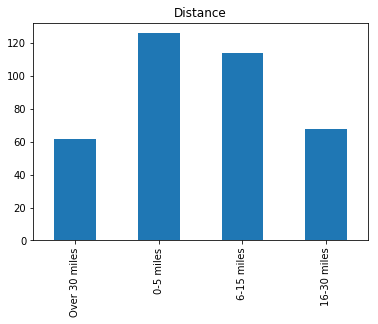

In [14]:
# create an indexed dataframe with the number of counts
# code adapted from https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.from_dict.html
df_dist = pd.DataFrame.from_dict(dist_counts, orient='index')
                      
#plot the bar chart of the distance counts
df_dist.plot(kind='bar', title='Distance', legend = False)
plt.show()

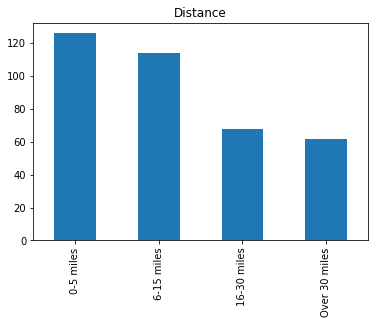

In [15]:
# set the order in which the plots are displayed for easier comparisons
df_dist.reindex(['0-5 miles', '6-15 miles',  '16-30 miles', 'Over 30 miles']).plot(kind='bar', title='Distance', legend = False)
plt.show()

This shows that most simulated participants traveled between 6 and 15 miles with the second longest duration being 0-5 miles. The other two bands had lower reported values. This compares favourably to Cassidy's findings of 109 traveling under 0.5 miles, 114 traveling between 6-15 miles, 67 traveling between 16-30 miles and 56 traveling over 30 miles. 


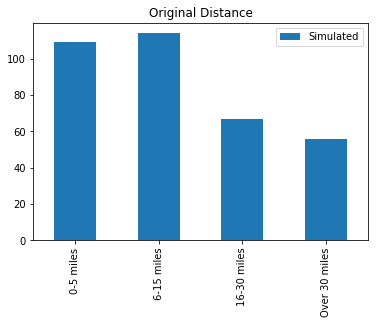

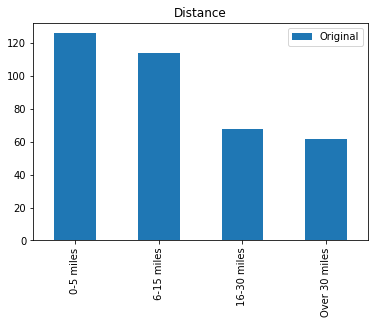

,Count
0-5 miles,109
6-15 miles,114
16-30 miles,67
Over 30 miles,56


In [89]:
df_dist

cass_dist = pd.DataFrame(np.array([[109, 114, 67, 56]]), columns=['0-5 miles', '6-15 miles',  '16-30 miles', 'Over 30 miles'])
cass_dist = cass_dist.transpose()
# check shape
cass_dist.head()
cass_dist.reindex(['0-5 miles', '6-15 miles',  '16-30 miles', 'Over 30 miles']).plot(kind='bar', title='Original Distance')
plt.legend(["Simulated"])
df_dist.reindex(['0-5 miles', '6-15 miles',  '16-30 miles', 'Over 30 miles']).plot(kind='bar', title='Distance')
plt.legend(["Original"]);
plt.show()

cass_dist.columns = ['Count']
cass_dist


American Psychological Association. (2010). Gender and Stress. Retrieved December 5, 2018, from https://www.apa.org/news/press/releases/stress/2010/gender-stress.aspx 


Cassidy, T. (1992),Commuting-related Stress: Consequences and Implications, Employee Councelling Today, Vol. 4 Iss
2 pp. 15 - 21 Retrieved from https://www.researchgate.net/profile/AnthonyTony_Cassidy/publication/235250379_Commuting-related_Stress_Consequences_and_Implications/links/574da3f608ae061b3303533c/Commuting-related-Stress-Consequences-and-Implications.pdf


Central Statistics Office. (2017, August 31). Census of Population 2016 – Profile 6 Commuting in Ireland. Retrieved November 24, 2018, from https://www.cso.ie/en/releasesandpublications/ep/p-cp6ci/p6cii/p6noc/

Cohen, S., Kamarck,, T., & Mermelstein, R. (1983). Perceived Stress Scale. Retrieved December 5, 2018, from https://das.nh.gov/wellness/docs/percieved stress scale.pdf 


Gatersleben, B., & Uzzell, D. (2007). Affective Appraisals of the Daily Commute: Comparing Perceptions of Drivers, Cyclists, Walkers, and Users of Public Transport. Environment and Behavior, 39(3), 416–431. https://doi.org/10.1177/0013916506294032



Hassard, J., Teoh, K., Cox, T., Dewe, P., Cosma, M., Gründler, R., . . . Van den Broek, K. (2014). Calculating the cost of work-related stress and psychosocial risks (Rep.). Luxembourg: Publications Office of the European Union. doi:10.2802/20493


Kéry, M., & Royle, J. A. (2016). Applied hierarchical modeling in ecology: Analysis of distribution, abundance and species richness in R and BUGS. Retrieved from https://www.sciencedirect.com/topics/earth-and-planetary-sciences/data-simulation

Monteiro, N.M. Shyngle K. Balogun & Kutlo N. Oratile (2014) Managing stress: the influence of gender, age and emotion regulation on coping among university students in Botswana, International Journal of Adolescence and Youth, 19:2, 153-173, DOI: 10.1080/02673843.2014.908784 

Stutzer, A., & Frey, B. S. (2008). Stress that Doesnt Pay: The Commuting Paradox*. Scandinavian Journal of Economics, 110(2), 339-366. doi:10.1111/j.1467-9442.2008.00542.x 

Wikipedia contributors. (2018, May 31). Perceived Stress Scale. In Wikipedia, The Free Encyclopedia. Retrieved 11:47, December 5, 2018, from https://en.wikipedia.org/w/index.php?title=Perceived_Stress_Scale&oldid=843740320


Wikipedia contributors. (2018, September 17). Stochastic process. In Wikipedia, The Free Encyclopedia. Retrieved 11:19, November 24, 2018, from https://en.wikipedia.org/w/index.php?title=Stochastic_process&oldid=859982240


Wikipedia contributors. (2018, November 12). Fight-or-flight response. In Wikipedia, The Free Encyclopedia. Retrieved 00:59, December 4, 2018, from https://en.wikipedia.org/w/index.php?title=Fight-or-flight_response&oldid=868423450


Wikipedia contributors. (2018, November 23). Human sex ratio. In Wikipedia, The Free Encyclopedia. Retrieved 13:07, November 24, 2018, from https://en.wikipedia.org/w/index.php?title=Human_sex_ratio&oldid=870236802

Wikipedia contributors. (2018, November 26). Likert scale. In Wikipedia, The Free Encyclopedia. Retrieved 12:01, December 5, 2018, from https://en.wikipedia.org/w/index.php?title=Likert_scale&oldid=870626181


UCLA: Statistical Consulting Group. (n.d.). What is the difference between categorical, ordinal and interval variables? Retrieved December 5, 2018, from https://stats.idre.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-interval-variables/ 


NumPy community, (2018). NumPy Reference Release 1.15.1.[ebook] Retrieved from https://docs.scipy.org/doc/numpy/numpy-ref-1.15.1.pdf

Oliphant, T. (2006). Guide to NumPy. 1st ed. [ebook] Available at: https://docs.scipy.org/doc/_static/numpybook.pdf [Accessed 20 Oct. 2018].




https://www.uzh.ch/cmsssl/suz/dam/jcr:ffffffff-866d-1ee0-0000-0000536ff1b9/10.04_stutzer-frey_08.pdf

[ref](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/what-are-categorical-discrete-and-continuous-variables/)

[ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.choice.html#numpy.random.choice)

[ref](https://www.datacamp.com/community/tutorials/categorical-data)

matplotlib manual 
numpy random manual

code adapted from https://stackoverflow.com/questions/49161120/pandas-python-set-value-of-one-column-based-on-value-in-another-column






### Duration
Add the duration data. 
This is simulated with np.random.choice
#### Why?
NumPy Random's choice was used to simulate the duration of commute. There are three bands and the data is ordinal, as there is a progression from 30 minutes to over 60 minutes. However as these choices were items on a survey NumPy Random's 'choice' function would be suitable as a model. There was a total of 355 responses to this section of the survey so this was taken as the total when calculating the probability weightings for each of the duration bands. A 'Duration' array was created containing the three duration bands, 0 to 30 minutes, 30- 60 minutes and over 60 minutes. There were 137 responses in the first band so this was weighted as 137/355, 121 for the second band giving a probability of 121/355 and 97 responses for the Over 60 minutes response giving a weighting of 97/355.  The model of the Duration variable can be found below.


In [ ]:
# add the duration categories
duration = ['0-30 minutes', '30-60 minutes', 'Over 60 minutes']
# calculate the total number of responses to this question
tot_dur = 137+121+97
# generate the responses to the 'Duration' category
y_dur = np.random.choice(duration, size, p=[137/tot_dur, 121/tot_dur, 97/tot_dur])

Change the y_dur duration array to a dataframe and add it to the simulated model. 

In [ ]:
df['Duration'] = pd.Series(y_dur)
df.head()

In [ ]:
df.tail()

Lets plot the histogram of the commute duration bands

In [ ]:
# calculate the number of responses to each duration band
dur_counts = Counter(df['Duration'])
# create an indexed dataframe with the number of counts
df_dur = pd.DataFrame.from_dict(dur_counts, orient='index')
                      
#plot the bar chart of the duration counts
df_dur.plot(kind='bar', title='Duration', legend = False)
plt.show()

This shows that durations of over an hour were not as common as durations between 0- 30 minutes (the most popular commute duration) and 30-60 minutes.  

### Time
Add the time data. 
This is simulated with np.random.choice
#### Why?
NumPy Random's choice was used to simulate the time spent commuting. There are four bands in this category. Again the data is ordinal, as there is a progression from 1 month to over 132 months.However as these choices were items on a survey NumPy Random's 'choice' function would be suitable as a model. There was a total of 343 responses to this section of the survey so this was taken as the total when calculating the probability weightings for each of the time bands. A 'Time' array was created containing the four time bands, 1 - 29 months, 30-60 months, 60-131 months and over 132 months. There were 73 responses in the first band so this was weighted as 73/343, 99 for the second band giving a probability of 99/343; 80 responses for the third band giving a weighting of 80/343 and finally 91 responses in the Over 132 month band giving a weighting of 91/343.   The model of the Time variable can be found below.

In [ ]:
# add the  time category bands
time = ['1-29 months', '30-60 months', '60-131 months', 'Over 132 months']
# calculate the number of responses to the Time category question
tot_time = 73+99+80+91
# generate the time category responses with their respective weightings
y_time = np.random.choice(time, size, p=[73/tot_time, 99/tot_time, 80/tot_time, 91/tot_time])

Change the y_time time array to a dataframe and add it to the simulated model. 

In [ ]:
df['Time'] = pd.Series(y_time)
df.head()

In [ ]:
df.tail()

Lets plot the histogram of the time spent as a commuter bands

In [ ]:
# calculate the number of responses to each duration band
time_counts = Counter(df['Time'])
# create an indexed dataframe with the number of counts
df_time = pd.DataFrame.from_dict(time_counts, orient='index')
                      
#plot the bar chart of the duration counts
df_time.plot(kind='bar', title='Time', legend = False)
plt.show()

This shows that the most popular time lengths of commuting was 30-60 months (2.5 - 5 years), followed closely by 60-131 years (5 - approx 11 years)then 1-29 months( up to 2.5 years) closely followed by over 132 months (11 years +)

### Impedance
Add the impedance data. 
Again this is simulated with np.random.choice

#### Why?
NumPy Random's choice was used to simulate the time spent commuting. There are three bands in this category, 17 mph or less, 17.3 - 30 mph and Over 30 mph. Again the data is ordinal, as there is a progression from 17 mph to over 30 mph. However as these choices were items on a survey NumPy Random's 'choice' function would be suitable as a model. There was a total of 370 responses to this section of the survey so this was taken as the total when calculating the probability weightings for each of the time bands (which in this case was the number of people surveyed). An 'Impedance' array was created containing the three impedance bands. There were 207 responses in the first band so this was weighted as 207/370, 97 for the second band giving a probability of 97/370; 66 responses for the third band giving a weighting of 66/370. The model of the Impedance variable can be found below.

In [ ]:
# create the impedance bands
impedance = ['17 mph or less', '17.3-30 mph', 'Over 30 mph']
# calculate the number of responses to the impedance question
tot_imp = 207+97+66
# generate responses to the impedence question
y_imp = np.random.choice(impedance, size, p=[207/tot_imp, 97/tot_imp, 66/tot_imp])


Change the y_imp impedance array to a dataframe and add it to the simulated model. 

In [ ]:
df['Impedance'] = pd.Series(y_imp)
df.head()

In [ ]:
df.tail()

Lets plot the histogram of the impedance distance bands

Lets plot the histogram of the commute distance bands

In [ ]:
# calculate the number of responses to each impedance band
imp_counts = Counter(df['Impedance'])
# create an indexed dataframe with the number of counts
df_imp = pd.DataFrame.from_dict(imp_counts, orient='index')
                      
#plot the bar chart of the duration counts
df_imp.plot(kind='bar', title='Impedance', legend = False)
plt.show()

This showed that the most common type of impedance was speeds under 17 mph with much less reported difficulty with the other two bands. The over 30 mph was reported as having the lowest impedance. 

### Other variables
The model also contained other information some of which would be useful to include such as gender and mode of transportation. 


### Gender
Add the gender data. 
Are stress levels due to commuting linked with gender? The gender data was simulated with np.random.choice

#### Why?
To simplify, assume two genders based on biological sex. There are approximately equal ratios of males to females (Wikipedia contributors, 2018 November 23). The probability p should be equally weighted for both. In Cassidy's study he surveyed 217 males and 153 females with the total number of participants at 370. choice is used to model the Gender field, although I had considered a Bernoulli (i.e. Binomial with n = 1)distribution, which was rejected as 'gender' is categorical data. 


Categorical data can be stored as text or as a number that maps to the category. The gender categories are also nominal in that there is no order preferences, female, male or male, female conveys the same information. There is no inherent order so a numerical distribution such as Bernoulli was rejected. NumPy Random's choice offered a way of modeling the 'Gender' column. A 'gender' array was created containing the 'Gender' category values, 'Male' and 'Female'. As Cassidy's investigation contained 370 participants, the size was specified as 370. Cassidy did not pole an equal proportion of males and females and this was reflected in the choices for p, 217 males from a population of 370 and 153 females from a population of 370 participants were surveyed. 



In [ ]:
gender = ['Male', 'Female']
y_gen = np.random.choice(gender, size, p=[217/size, 153/size])


This is in array form which will be changed to dataframe form. 

In [ ]:
df['Gender'] = pd.Series(y_gen)
df.head()

In [ ]:
df.tail()

Lets plot the histogram of the participants gender.

In [ ]:
# calculate the number of males and females
gen_counts = Counter(df['Gender'])
# create an indexed dataframe with the number of counts
df_gen = pd.DataFrame.from_dict(gen_counts, orient='index')
                               
# plot the bar chart of the gender counts
df_gen.plot(kind='bar', title='Gender', legend = False)
plt.show()



There were more males participating in this study than females and this is reflected in the histogram above. 

### Transport
The method of transportation data could be car or public transport. This is simulated with np.random.choice

#### Why?
NumPy Random's choice was used to simulate the mode of transportation. There are two bands in this category, car or public transport. Like gender the data is nominal However as these choices were items on a survey NumPy Random's 'choice' function would be suitable as a model. There was a total of 313 responses to this section of the survey so this was taken as the total when calculating the probability weightings for each of the transport bands. A 'Transport' array was created containing the two transport bands, car and public transport. There were 124 responses in the first band so this was weighted as 124/313 and 189 responses for the public transport band giving a probability of 189/313. The model of the Transport variable can be found below.

In [ ]:
# create the Transport response bands  
transport = ['Car', 'Public transport']
# calculate the number of responses
tot_tran = 124+189
# generate the transport response array
y_tran = np.random.choice(transport, size, p= [124/tot_tran, 189/tot_tran])


Change the y_tran transportation array to a dataframe and add it to the simulated model. 

In [ ]:
df['Transport'] = pd.Series(y_tran)
df.head()

In [ ]:
df.tail()

Lets plot the histogram of the mode of transportation.

In [ ]:
# calculate the number of responses to each impedance band
tran_counts = Counter(df['Transport'])
# create an indexed dataframe with the number of counts
df_tran = pd.DataFrame.from_dict(tran_counts, orient='index')
                      
#plot the bar chart of the duration counts
df_tran.plot(kind='bar', title='Transport', legend = False)
plt.show()

This shows that most participants used public transportation. It would be interesting to see if traveling by bus or train increased or decreased stress. Car transport provides a greater perception of situational control. However, it is debatable which mode provides greater stress. Being in control of the driving in stressful traffic may be more stress inducing than sleeping on bus or train. I would not expect a clear linear relationship between transportation mode and stress. 

### Age
No information was given in the report on the age range of participants. As the time commuting bvariable was up to 132 months or 11 years I assumed that the age range minimum was 11 years plus the assumed school leaving age of 18 i.e. 29 years and the maximum age was the then retirement age of 65. Age composition takes a pyramid structure with a greater number of people in the younger age bands than in the older ones [ref](https://www.ssc.wisc.edu/~walker/wp/wp-content/uploads/2012/01/E623PopDividend.pdf)


![Age pyramid](img/1992%20age%20pyramid.JPG)

The above distribution looks to be roughly uniform till about age 45 and then triangular from age 45 to 90. [](graph taken from https://g.redditmedia.com/xlCvXoGuPg8PujIhXwsZl4WTWTZwVDh59LToqY_I2HY.gif?fm=mp4&mp4-fragmented=false&s=aeaa3dc089e147917831677d8ee15699

No single NumPy Random function models this distribution but it could be modeled by a combination of uniform and triangular distribution functions. 
Assumptions
* Assume the questionnaire data came from the year the report was written i.e. 1992. 
* Assume this image is correct as a model of the 1992 populations
* Assume that male and female population distribution are the same
* Assume population is uniformly distributed up to age 45 and triangularly distributed from 45 years onwards

In [ ]:
# code adapted from https://stackoverflow.com/questions/36537811/numpy-trapezoidal-distribution-for-age-distribution

# model the distribution of the Age pyramid assume Male and Female are similarly distributed

def agedistro(turn,end,size):
    pass
    totarea = turn + (end-turn)/2  # e.g. 45 + (90-45)/2 turn is when distrubution shape switches
    areauptoturn = turn             # say 45
    areasloped = (end-turn)/2     # (90-45)/2
    size1= int(size*areauptoturn/totarea)
    size2= size- size1 
    s1 = np.random.uniform(low=29,high=turn,size= size1)  # school age plus 11 years commuting is 29
    s2 = np.random.triangular(left=turn,mode=turn,right=end,size=size2) #(left, mode, right, size=None)
            # mode : scalar-  the value where the peak of the distribution occurs. 
            #The value should fulfill the condition left <= mode <= right.
    s3= np.concatenate((s1,s2)) # don't use add , it will add the numbers piecewise
    return s3

s3=agedistro(turn=45,end=65,size=size).astype(int)   # in 1992 data appears roughly uniform till 45, and still working so under retirement age
y_age = np.random.choice(s3, size) # ages come from this distribution
df['Age'] = pd.Series(y_age)
df.head()
 

In [ ]:
df.tail()

In [ ]:
# calculate the ages of the participants 
age_counts = Counter(df['Age'])
# create an indexed dataframe with the number of counts
df_age = pd.DataFrame.from_dict(age_counts, orient='index')
                      
#plot the bar chart of the duration counts
df_age.plot(kind='bar', title='Age', legend = False)
plt.show()

### Stress
Cassidy, (1992) measured stress over five domains, home, commute, work, leisure and personal. There was no numerical data given on these measures but three bar charts illustrated the report graphs with data from these domains. The y axis for each figure was 'score' ranging from 0 to 50. To simplify, stress was modeled on one general domain by a score on a ten question 5 point Likert  scale. 

Each participant will generate a response to 10 stress related questions which will be one of the numbers 0 to 4. These will be summed to provide a general stress score for each participant. 
The responses to the 10 questions can be  0 - never 1 - almost never 2 - sometimes 3 - fairly often 4 - very often. These will be summed across each row to provide a stress score for each participant. 



In [ ]:
# create the questionnaire dataframe 
df_q = pd.DataFrame(columns = ['Question 1','Question 2','Question 3','Question 4','Question 5','Question 6','Question 7','Question 8','Question 9','Question 10', 'Score'], index = x)
df_q.head()



In [ ]:
#for each question fill it with simulated responses
# create the stress band resposes 0 - never 1 - almost never 2 - sometimes 3 - fairly often 4 - very often
responses = [0, 1, 2, 3, 4]
responses
print("where the response ", responses[0], " equals never" )
print("where the response ", responses[1], " equals almost never" )
print("where the response ", responses[2], " equals sometimes" )
print("where the response ", responses[3], " equals fairly often" )
print("where the response ", responses[4], " equals very often" )



Stress scores is calculated by summing each participants responses to the 10 questions. The minimum score achievable is 0 (a response of 0 for every question) and the maximum is $4 \times 10 = 40$ (a response of 4 for every question)

In [ ]:
# generate the transport response array

y_q1 = np.random.choice(responses, size)
y_q2 = np.random.choice(responses, size)
y_q3 = np.random.choice(responses, size)
y_q4 = np.random.choice(responses, size)
y_q5 = np.random.choice(responses, size)
y_q6 = np.random.choice(responses, size)
y_q7 = np.random.choice(responses, size)
y_q8 = np.random.choice(responses, size)
y_q9 = np.random.choice(responses, size)
y_q10 = np.random.choice(responses, size)
# make sure scores is empty before populating it

df_q['Question 1'] = pd.Series(y_q1)
df_q['Question 2'] = pd.Series(y_q2)
df_q['Question 3'] = pd.Series(y_q3)
df_q['Question 4'] = pd.Series(y_q4)
df_q['Question 5'] = pd.Series(y_q5)
df_q['Question 6'] = pd.Series(y_q6)
df_q['Question 7'] = pd.Series(y_q7)
df_q['Question 8'] = pd.Series(y_q8)
df_q['Question 9'] = pd.Series(y_q9)
df_q['Question 10'] = pd.Series(y_q10)


In [ ]:
df_q.head()


In [ ]:
df.tail()

Now sum up the question scores on the 10 questions for each participant by summing rows. 

In [ ]:
# sum the rows to get the stress score
# adapted from https://stackoverflow.com/questions/44003371/all-row-sum-with-pandas-except-one
df_q['Score'] = df_q.drop('Score', axis=1).sum(axis=1) # sum the rows that are not 'Score' and put the answer into 'Score'
df_q.head()

In [ ]:
df_q.describe()

In [ ]:
# add the stress score to the dataframe
df['Stress'] = df_q['Score']
df.head()


In [ ]:
df.describe()

The maximum score should be 40 or under. 

Now the score should be adjusted to reflect that higher impedance should be correlated to higher stress levels. Indeed impedance itself may be a function of distance and duration; e.g. if it takes a longer duration to travel the commuting distance then the speed (impedance)which is distance over time will be lower. Find a way of adding numbers to the score



In [ ]:
# Score impedance
# take a copy of the impendace data and put it in a new column
df['Impedance Score'] = df['Impedance']
# find all values in impendace that are '17 mph or less' and set it to 2 in the impedance score column
# the slower the speed the more the stress
df.loc[df['Impedance'] == '17 mph or less', 'Impedance Score'] = 2
df.loc[df['Impedance'] == '17.3-30 mph', 'Impedance Score'] = 1
df.loc[df['Impedance'] == 'Over 30 mph', 'Impedance Score'] = 0
# add the impedance score to the stress value
df['Stress'] = df['Stress'] + df['Impedance Score']
df.head()





        

In [ ]:
# Score distance
# take a copy of the distance data and put it in a new column
df['Distance Score'] = df['Distance']
# find all values in distance that are '0.5' and set it to 0 in the distance score column etc...
# the less miles travelled the less stress
df.loc[df['Distance'] == '0.5 miles', 'Distance Score'] = 0
df.loc[df['Distance'] == '6-15 miles', 'Distance Score'] = 1
df.loc[df['Distance'] == '16-30 miles', 'Distance Score'] = 2
df.loc[df['Distance'] == 'over 30 miles', 'Distance Score'] = 3
# add the Distance score to the stress value
df['Stress'] = df['Stress'] + df['Distance Score']
df.head()




In [ ]:
# Score duration
# take a copy of the duration data and put it in a new column
df['Duration Score'] = df['Duration']
# find all values in duration that are '0.5' and set it to 0 in the duration score column etc...
# the shorter the commute duration the less stress
df.loc[df['Duration'] == '0-30 minutes', 'Duration Score'] = 0
df.loc[df['Duration'] == '30-60 minutes', 'Duration Score'] = 1
df.loc[df['Duration'] == 'Over 60 minutes', 'Duration Score'] = 2
# add the duration score to the stress value
df['Stress'] = df['Stress'] + df['Duration Score']
df.head()



In [ ]:
# Score time
# take a copy of the time data and put it in a new column
df['Time Score'] = df['Time']
# find all values in time that are '1-29 months' and set it to 0 in the time score column etc...
# the less years spent commuting the less stress - not sure if this is right - do some research on the topic
df.loc[df['Time'] == '1-29 months', 'Time Score'] = 0
df.loc[df['Time'] == '30-60 months', 'Time Score'] = 1
df.loc[df['Time'] == '60-131 months', 'Time Score'] = 2
df.loc[df['Time'] == 'Over 132 months', 'Time Score'] = 3
# add the time score to the stress value
df['Stress'] = df['Stress'] + df['Time Score']
df.head()

In [ ]:
# drop variable score values as they are now in the stress column
df.drop(['Impedance Score', 'Distance Score', 'Duration Score', 'Time Score'], axis=1, inplace = True)
# rename Stress as Stress Score
df.rename(columns={'Stress': 'Stress Score'}, inplace = True)
df.head()


 The full data is below along with the information and description of it.                      


In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.nunique()

In [ ]:
plt.figure();
df['Stress Score'].plot.hist(stacked=False, bins=40)
df_imp.plot.hist(stacked = True, bins = 20)

## References


In [ ]:
Cohen, S., Kamarck, T., & Mermelstein, R. (1983). A Global Measure of Perceived Stress. Journal of Health and Social Behavior, 24(4), 385-396. Retrieved from http://www.jstor.org/stable/2136404